In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Define directories for training and validation data
train_dir = 'G:/LBCS/Deep Learning/Deep Learning Assignment/train'
test_dir  = 'G:/LBCS/Deep Learning/Deep Learning Assignment/test'

In [3]:

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

In [4]:
# Create data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 136 images belonging to 1 classes.
Found 157 images belonging to 1 classes.


In [5]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

Epoch 1/10


4/4 [==============================] - 31s 6s/step - loss: 0.2075 - accuracy: 0.9375 - val_loss: 3.5298e-12 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 12s 4s/step - loss: 4.7192e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 11s 3s/step - loss: 7.5451e-18 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 11s 3s/step - loss: 7.5738e-30 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 11s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 11s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 11s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - v

In [8]:
# Evaluate the model
predictions = model.predict(test_generator)
y_pred = np.round(predictions).flatten()
y_true = test_generator.classes

5/5 [==============================] - 9s 1s/step


In [9]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [10]:

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[157]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



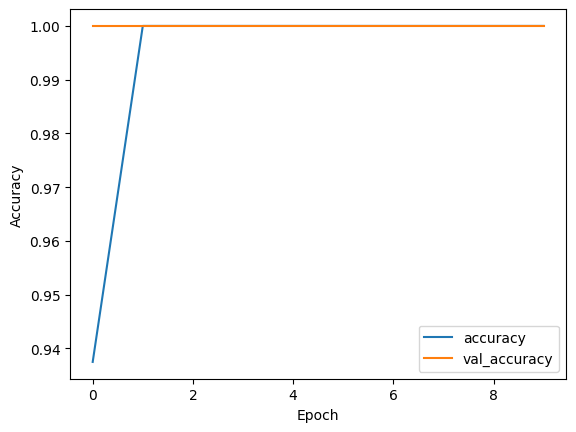

In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()